

# Simple Linear Regression Using Scikit-learn


## Introduction

In this project, we study a simple linear regression using the machine learning library, scikit-learn. Our analysis uses the [dataset](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64) about model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. 

This project is divided in the following way:

1. Load and Wrangling Data
2. Exploratory Data Analysis & Visualizations
3. Linear Regression
4. Conclusions

In [27]:
# Imported some important libraries.
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy import stats

%matplotlib inline 

## Load and Wrangling Data

After import libraries to analyse data, we load the first five rows of our dataset.

In [2]:
# Load csv file.
data = pd.read_csv("data/MY2021_Fuel_Consumption_Ratings.csv")
data.head(5)

,Model Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,2021,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,199,6,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,26,256,4,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [3]:
# information about a data including the index dtype and columns, non-null values and memory usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Model Year                        941 non-null    int64  
 1   Make                              941 non-null    object 
 2   Model                             941 non-null    object 
 3   Vehicle Class                     941 non-null    object 
 4   Engine Size (L)                   941 non-null    float64
 5   Cylinders                         941 non-null    int64  
 6   Transmission                      941 non-null    object 
 7   Fuel Type                         941 non-null    object 
 8   Fuel Consumption City (L/100 km)  941 non-null    float64
 9   Hwy (L/100 km)                    941 non-null    float64
 10  Comb (L/100 km)                   941 non-null    float64
 11  Comb (mpg)                        941 non-null    int64  
 12  CO2 Emis

In [4]:
# Rename columns.
new_cols = {'Model Year': 'model_year', 'Make': 'make', 'Model': 'models', 'Vehicle Class': 'vehicle_class', 'Engine Size (L)':'engine_size',
            'Cylinders': 'cylinders', 'Transmission': 'trasmission', 'Fuel Type': 'fuel_type', 'Fuel Consumption City (L/100 km)':'fuel_consumption_city', 
            'Hwy (L/100 km)': 'fuel_consumption_hwy', 'Comb (L/100 km)': 'fuel_consumption_comb', 'Comb (mpg)': 'fuel_consumption_comb_mpg',
            'CO2 Emissions (g/km)': 'fuel_consumption_comb_mpg', 'CO2 Emissions (g/km)': 'co2_emissions', 
            'CO2 Rating': 'co2_rating', 'Smog Rating': 'smog_rating'}

data.rename(columns=new_cols, inplace=True)
data.head()

,model_year,make,models,vehicle_class,engine_size,cylinders,trasmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions,co2_rating,smog_rating
0,2021,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,199,6,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,26,256,4,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [5]:
# Check for duplicates.
data.duplicated().sum()

0

The following code detect if there are any missing values that are being represented by either '?' or blank cells.

In [6]:
for i in data.columns.tolist():
    if ('?' in data[i].tolist() or ' ' in data[i].tolist()):
        flag = True
    else:
        flag = False
print(flag)

False


In [7]:
# Check null values
data.isnull().sum()

model_year                   0
make                         0
models                       0
vehicle_class                0
engine_size                  0
cylinders                    0
trasmission                  0
fuel_type                    0
fuel_consumption_city        0
fuel_consumption_hwy         0
fuel_consumption_comb        0
fuel_consumption_comb_mpg    0
co2_emissions                0
co2_rating                   0
smog_rating                  0
dtype: int64

## Exploratory Data Analysis & Visualizations 

In [8]:
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset distribution.
data.describe()

,model_year,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions,co2_rating,smog_rating
count,941.0,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000
mean,2021.0,3.221360,5.732200,12.533900,9.325186,11.088098,27.304995,259.180659,4.348565,4.719447
std,0.0,1.395289,1.999073,3.557911,2.239076,2.916320,7.746891,65.652950,1.645649,1.722175
min,2021.0,1.000000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2021.0,2.000000,4.000000,10.100000,7.700000,9.100000,22.000000,213.000000,3.000000,3.000000
50%,2021.0,3.000000,6.000000,12.100000,9.000000,10.700000,26.000000,255.000000,4.000000,5.000000
75%,2021.0,4.000000,8.000000,14.800000,10.800000,13.100000,31.000000,305.000000,5.000000,6.000000
max,2021.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


Here, we calculate the Pearson correlation coefficient between of variables of dataset.

In [9]:
# Variable that contains Pearson correlation between of variables.
msk = data.corr()
msk

,model_year,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions,co2_rating,smog_rating
model_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine_size,NaN,1.000000,0.919203,0.833628,0.752797,0.819025,-0.710473,0.826651,-0.784015,-0.513584
cylinders,NaN,0.919203,1.000000,0.846191,0.749480,0.826439,-0.698623,0.839177,-0.773888,-0.542830
fuel_consumption_city,NaN,0.833628,0.846191,1.000000,0.927833,0.991517,-0.901156,0.967577,-0.918483,-0.581740
fuel_consumption_hwy,NaN,0.752797,0.749480,0.927833,1.000000,0.968173,-0.883368,0.934762,-0.895114,-0.500743
fuel_consumption_comb,NaN,0.819025,0.826439,0.991517,0.968173,1.000000,-0.910030,0.972395,-0.925944,-0.564584
fuel_consumption_comb_mpg,NaN,-0.710473,-0.698623,-0.901156,-0.883368,-0.910030,1.000000,-0.906216,0.949533,0.526155
co2_emissions,NaN,0.826651,0.839177,0.967577,0.934762,0.972395,-0.906216,1.000000,-0.952865,-0.592154
co2_rating,NaN,-0.784015,-0.773888,-0.918483,-0.895114,-0.925944,0.949533,-0.952865,1.000000,0.562310
smog_rating,NaN,-0.513584,-0.542830,-0.581740,-0.500743,-0.564584,0.526155,-0.592154,0.562310,1.000000


In this code snippet, we get the names of the columns whose correlations between them and CO$_2$ emission are perfect, strong, and moderate positive or negative, that is, the absolute Pearson coefficient values are greater-equal to $0.5$.

In [10]:
# Variable that contains columns names.
correlation_cols = msk[abs(msk['co2_emissions']) > 0.5].index.tolist()
correlation_cols

['engine_size',
 'cylinders',
 'fuel_consumption_city',
 'fuel_consumption_hwy',
 'fuel_consumption_comb',
 'fuel_consumption_comb_mpg',
 'co2_emissions',
 'co2_rating',
 'smog_rating']

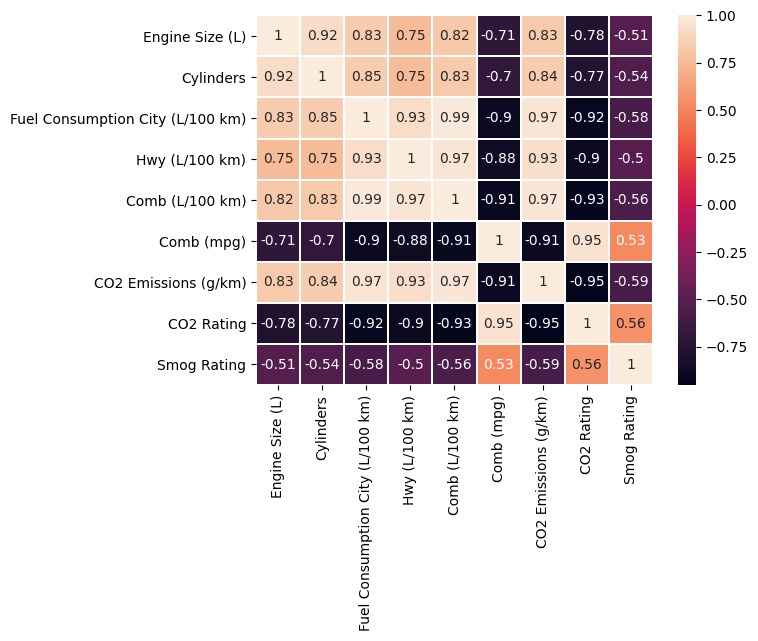

In [11]:
names = ['Engine Size (L)','Cylinders', 'Fuel Consumption City (L/100 km)','Hwy (L/100 km)',
         'Comb (L/100 km)', 'Comb (mpg)', 'CO2 Emissions (g/km)', 'CO2 Rating', 'Smog Rating']

sns.color_palette("YlOrBr", as_cmap=True)
sns.heatmap(data[correlation_cols].corr(), annot = True, linewidths = 0.2, xticklabels = names, yticklabels = names)
plt.show()

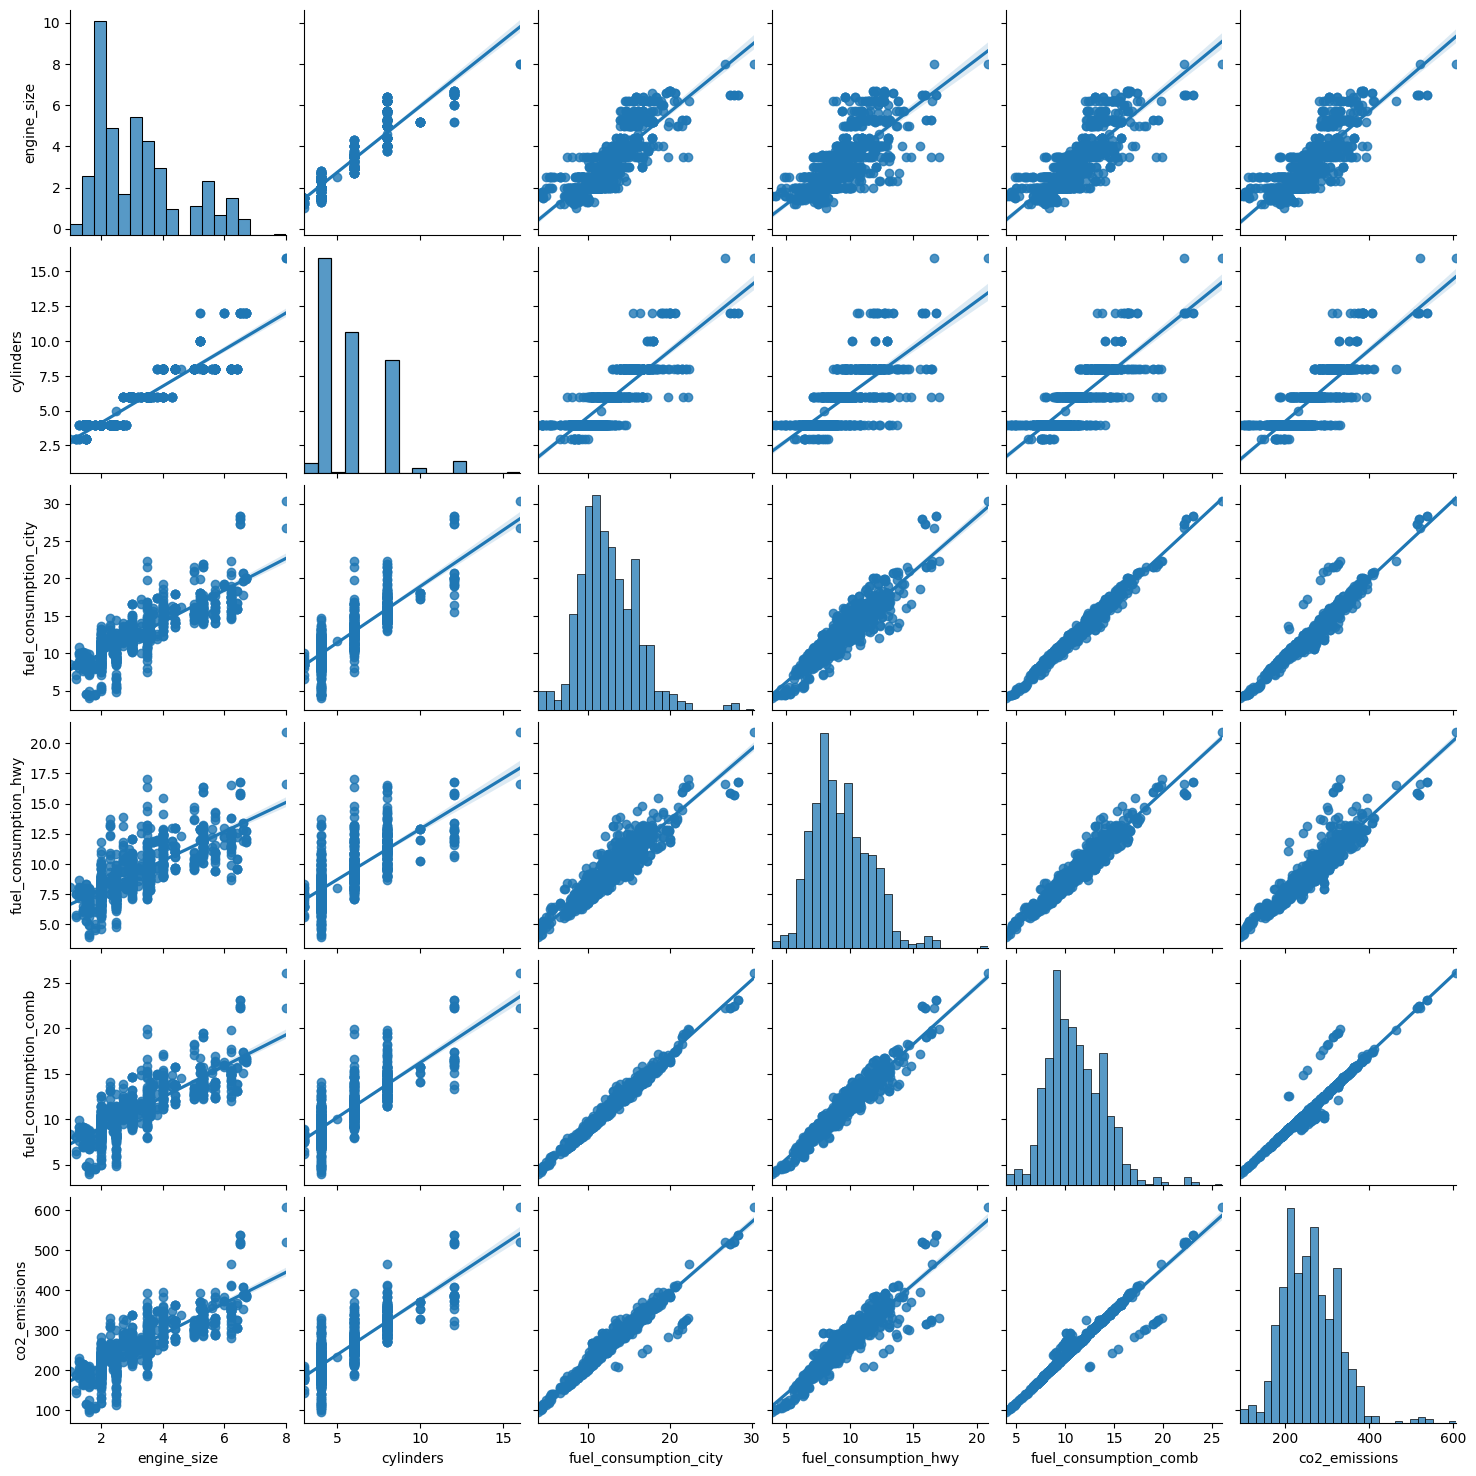

In [12]:
# 
sns.pairplot(data, kind="reg", x_vars = ['engine_size', 'cylinders', 'fuel_consumption_city', 'fuel_consumption_hwy', 'fuel_consumption_comb', 'co2_emissions'],
            y_vars = ['engine_size', 'cylinders', 'fuel_consumption_city', 'fuel_consumption_hwy', 'fuel_consumption_comb', 'co2_emissions'])

plt.show()

In [13]:
dados = ['engine_size', 'cylinders', 'fuel_consumption_city', 
         'fuel_consumption_hwy', 'fuel_consumption_comb', 'co2_emissions']
for i in dados:
    c , p = stats.pearsonr(data[i],data['co2_emissions'])
    print("correlation coefficient of " + str(i) + " " + str(c)+ " p-value : " + str(p))

correlation coefficient of engine_size 0.8266506188500937 p-value : 1.0452630472626804e-236
correlation coefficient of cylinders 0.8391769107565363 p-value : 1.2964461884677082e-250
correlation coefficient of fuel_consumption_city 0.9675774339031579 p-value : 0.0
correlation coefficient of fuel_consumption_hwy 0.9347620262065439 p-value : 0.0
correlation coefficient of fuel_consumption_comb 0.9723954647442398 p-value : 0.0
correlation coefficient of co2_emissions 0.9999999999999999 p-value : 0.0


In [14]:
# Select the features with p-value and correlation coefficient
data = data[['engine_size', 'cylinders', 'fuel_consumption_city', 
             'fuel_consumption_hwy', 'fuel_consumption_comb', 'co2_emissions']]
data.head()

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,co2_emissions
0,2.4,4,9.9,7.0,8.6,199
1,3.5,6,11.1,10.8,11.0,256
2,2.0,4,11.0,8.6,9.9,232
3,2.0,4,11.3,9.1,10.3,242
4,2.0,4,11.2,8.0,9.8,230


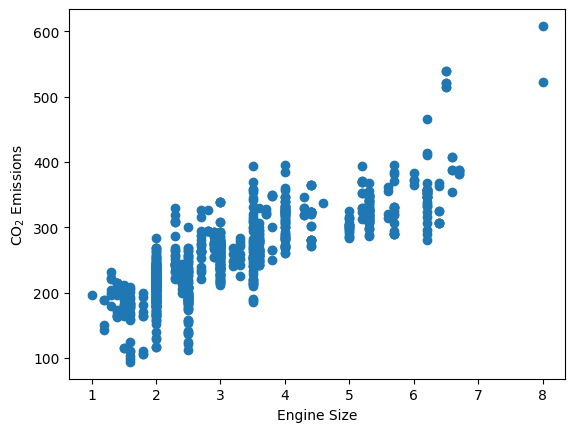

In [15]:
x = data.engine_size
y = data.co2_emissions

plt.scatter(x, y)
plt.xlabel('Engine Size')
plt.ylabel('CO$_2$ Emissions')
plt.show()

In [20]:
y_data = data.co2_emissions
x_data = data.drop('co2_emissions', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=42)